In [1]:
from itertools import cycle
import sys
import time

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from other_algorithms import pointwise_srls
import plotting_tools as pt
import probability_functions as p
from create_trajectory import get_trajectory
%matplotlib inline

In [2]:
lines = ["-", "--", "-.", ":"]
linecycler = cycle(lines)

In [3]:
n_measurement_list = range(10, 40)

experiment_params={
    "n_dimensions": 2,
    "n_anchors": 4,
    "n_constraints": 5,
    "n_anchors_list": [3, 4, 5],
    "n_constraints_list": [3, 5, 7],
}

start = time.time()
probabilities_anchors = []
for idx, n_anchors in enumerate(experiment_params["n_anchors_list"]):
    print("{} anchors".format(n_anchors))
    probabilities_anchors.append([p.probability_upper_bound(
        n_dimensions=experiment_params["n_dimensions"],
        n_constraints=experiment_params["n_constraints"],
        n_measurements=n,
        position_wise=False,
        n_anchors=n_anchors,
        n_times=np.Infinity,
        full_matrix=True
    ) for n in n_measurement_list])
probabilities_anchors = np.array(probabilities_anchors)
print("anchors total time: {:.2f}s".format(time.time()-start))

start = time.time()
probabilities_constraints = []
for idx, n_constraints in enumerate(experiment_params["n_constraints_list"]):
    print("{} constraints".format(n_constraints))
    probabilities_constraints.append([p.probability_upper_bound(
        n_dimensions=experiment_params["n_dimensions"],
        n_constraints=n_constraints,
        n_measurements=n,
        position_wise=False,
        n_anchors=experiment_params["n_anchors"],
        n_times=np.Infinity,
        full_matrix=True,
    ) for n in n_measurement_list])
probabilities_constraints = np.array(probabilities_constraints)
print("constrains total time: {:.2f}s".format(time.time()-start))

3 anchors
4 anchors
5 anchors
anchors total time: 1.93s
3 constraints
5 constraints
7 constraints
constrains total time: 1.36s


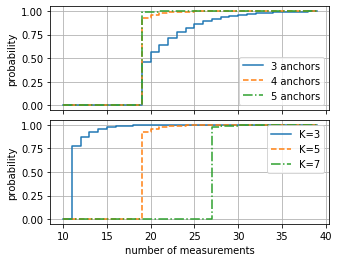

In [4]:
fig, axis = plt.subplots(2, 1, figsize=(5, 4), sharex='col', gridspec_kw={'hspace': 0.1, 'wspace': 0})

linecycler = cycle(lines)
for idx, n_anchors in enumerate(experiment_params["n_anchors_list"]):

    p = axis[0].step(
        n_measurement_list,
        probabilities_anchors[idx],
        label="{} anchors".format(n_anchors),
        where='post',
        linestyle=next(linecycler))
axis[0].set_ylabel("probability")
axis[0].grid()
axis[0].legend(loc='lower right')

linecycler = cycle(lines)
for idx, n_constraints in enumerate(experiment_params["n_constraints_list"]):

    p = axis[1].step(
        n_measurement_list,
        probabilities_constraints[idx],
        label="K={}".format(n_constraints),
        where='post',
        linestyle=next(linecycler))
axis[1].set_xlabel("number of measurements")
axis[1].set_ylabel("probability")
axis[1].grid()
axis[1].legend()

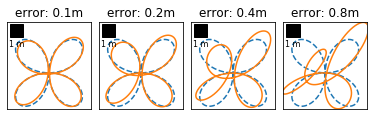

In [5]:
np.random.seed(0)

fig, axis = plt.subplots(1, 4, figsize=(5, 1.2), sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0.1})
traj = get_trajectory("clover")
traj.scale_bounding_box([5, 5])
error = np.random.normal(size=traj.coeffs.shape)
error = error/np.linalg.norm(error)

for idx, scale in enumerate([0.1, 0.2, 0.4, 0.8]):
    ax = axis[idx]
    traj.plot(ax=ax, linestyle='--')
    perturbed = traj.copy()
    perturbed.coeffs += scale*error
    perturbed.plot(ax=ax)
    ax.axis('equal')
    ax.set_title("error: {}m".format(scale))
    pt.add_scalebar(ax, loc='upper left', size=1)
    pt.remove_ticks(ax)

reading results/noise_and_anchors/result_num-not-accurate_0.npy
new key: num-not-accurate
reading results/noise_and_anchors/result_distances_0.npy
new key: distances
reading results/noise_and_anchors/result_absolute-errors_0.npy
new key: absolute-errors
reading results/noise_and_anchors/result_successes_0.npy
new key: successes
reading results/noise_and_anchors/result_num-not-solved_0.npy
new key: num-not-solved
reading results/noise_and_anchors/result_relative-errors_0.npy
new key: relative-errors
reading results/noise_and_anchors/result_errors_0.npy
new key: errors
anchors 3
fitted slope: -0.66
anchors 5
fitted slope: -0.54
anchors 10
fitted slope: -0.55
reading results/noise_right_inverse_weighted/result_num-not-accurate_0.npy
new key: num-not-accurate
reading results/noise_right_inverse_weighted/result_distances_0.npy
new key: distances
reading results/noise_right_inverse_weighted/result_absolute-errors_0.npy
new key: absolute-errors
reading results/noise_right_inverse_weighted/res

Text(0.5, 15.0, 'number of measurements')

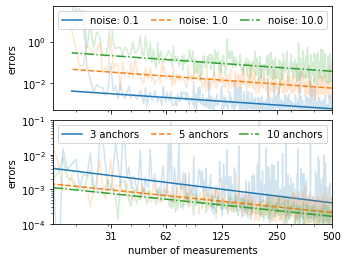

In [6]:
fig, axis = plt.subplots(2, 1, figsize=(5, 4), sharex='col', gridspec_kw={'hspace': 0.1, 'wspace': 0})

plot = pt.plot_noise('noise_and_anchors',
                     error_types=['errors'],
                     save_figures=True,
                     min_noise=0,
                     max_noise=None,
                     background_alpha=0.2,
                     start=30,
                     anchors=True,
                     ax=axis[1])
plot = pt.plot_noise('noise_right_inverse_weighted',
                     error_types=['errors'],
                     save_figures=False,
                     max_noise=None,
                     background_alpha=0.2,
                     start=100,
                     ax=axis[0])
plot.set_xticks([31, 62, 125, 250, 500])
axis[0].set_xlim(15, 500)
axis[1].set_ylim(1e-4, 1e-1)
axis[0].set_ylim(5e-4, 5e1)
axis[0].grid()
axis[1].grid()
axis[0].set_ylabel('errors')
axis[1].set_xlabel("number of measurements")